# Лабораторная работа №4.3.1

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 1. Дифракция Френеля.

Ширина щели $S_2$: $b = 1.5$ мм

Длина волны: $\lambda = 546 * 10^{-10}$ м

#### Таблица с данными для построения зависимости $z = z(n)$:

n |   1  |   2  |   3  |   4  |   5  |   6  
-:|:----:|:----:|:----:|:----:|:----:|:----:
z | 0.8  | 0.59 | 0.47 | 0.28 | 0.23 | 0.19

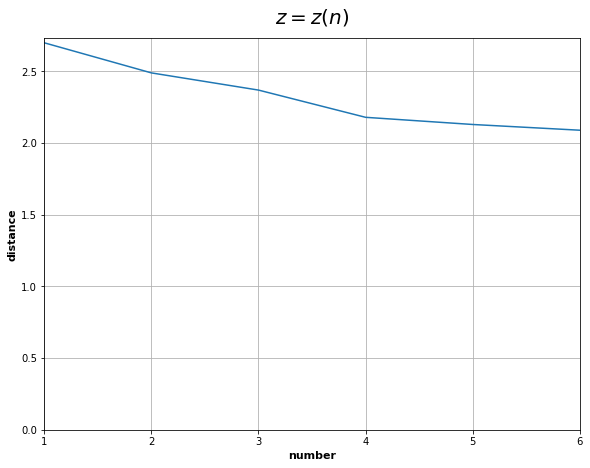

In [31]:
numbers = np.arange(1, 7)
dist = np.array([0.8, 0.59, 0.47, 0.28, 0.23, 0.19], dtype=np.float64) + 1.9

fig, ax = plt.subplots(figsize=(6.4 * 1.5, 4.8 * 1.5))

ax.set_title(r'$z = z(n)$', fontsize=20, fontweight='bold', pad=15)

ax.plot(numbers, dist)
ax.set_xticks(numbers)
ax.set_xlim(np.min(numbers), np.max(numbers))
ax.set_ylim(0)
ax.set_xlabel('number', fontsize=11, fontweight='bold')
ax.set_ylabel('distance', fontsize=11, fontweight='bold')

ax.grid()

plt.show()

#### Обработка результатов. 

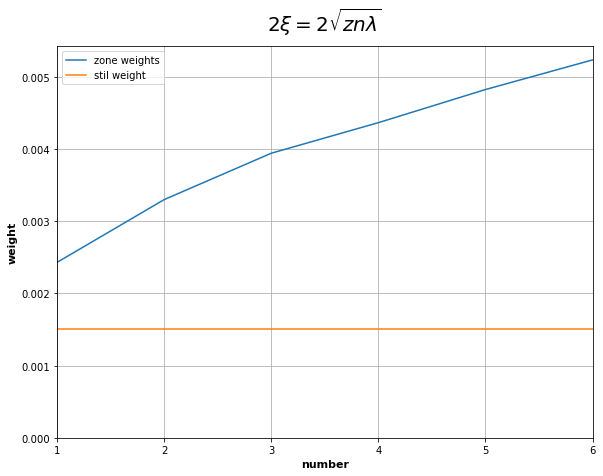

In [35]:
lamb = 5461 * 10 ** (-10)
ksi = np.sqrt(dist * numbers * lamb)

fig, ax = plt.subplots(figsize=(6.4 * 1.5, 4.8 * 1.5))

ax.set_title(r'$2 \xi = 2 \sqrt{zn \lambda}$', fontsize=20, 
             fontweight='bold', pad=15)
ax.plot(numbers, 2 * ksi, label='zone weights')
ax.plot(np.arange(1, 7), [1.5 / 1000 for i in range(6)],
       label='stil weight')
ax.set_xticks(numbers)
ax.set_xlim(np.min(numbers), np.max(numbers))
ax.set_xlabel('number', fontsize=11, fontweight='bold')
ax.set_ylim(0)
ax.set_ylabel('weight', fontsize=11, fontweight='bold')

ax.grid()
ax.legend()

plt.show()

## 2.Дифракция Фраунгофера.

### Опыт №2.1

Ширина щели $S_2$: $b = 0.89$ мм

Фокусное расстояние $f_2 = 27$ см

#### Таблица зависимости $x = x(m)$:

m |  1   |  2   |  3   
-:|:----:|:----:|:----:
x | 0.02 | 0.03 | 0.05

#### Класс для подсчёта МНК.

In [42]:
class MNK():
    """
    Special class to store all data for linear MNK
    and make all necessary calculations
    
    """
    def __init__(self, input_filename):
        self.__input_filename = input_filename
        self.__x = []
        self.__y = []
        self.__k = 0.
        self.__b = 0.
        self.__sigma_k = 0.0
        self.__sigma_b = 0.0
        
    def __count_k(self):
        """
        Calculates slope ratio k and sigma_k
        
        """
        try:
            up = np.mean(self.__x * self.__y) - np.mean(self.__x) * np.mean(self.__y)
            down = np.mean(self.__x ** 2) - np.mean(self.__x) ** 2
            
            if down == 0:
                raise ZeroDivisionError
                
            self.__k = up / down
            sigma_up = np.mean(self.__y ** 2) - np.mean(self.__y) ** 2
            under_sqrt = sigma_up / down
            
            if under_sqrt < 0:
                raise RuntimeError
                
            self.__sigma_k = np.sqrt(under_sqrt / len(self.__x))
            
        except ZeroDivisionError:
            print('Error: ZeroDivision in __count_k()')
            
        except RuntimeError:
            print('Error: NegativeValue under square root in __count_k()')
            
    def __count_b(self):
        """
        Calculates vertical shift 
        
        """
        try:
            self.__b = np.mean(self.__y) - self.__k * np.mean(self.__x)
            under_sqrt = np.mean(self.__x ** 2) - np.mean(self.__x) ** 2
            
            if under_sqrt < 0:
                raise RuntimeError
                
            self.__sigma_b = np.sqrt(under_sqrt) * self.__sigma_k
            
        except RuntimeError:
            print('Error: NegativeValue undeer square root in __count_b()')
            
    def read_data(self):
        """
        Read x and y values
        
        """
        try:
            file = open(self.__input_filename, 'r')
            lines = [line.strip() for line in file]
            
            for i, line in enumerate(lines):
                lines[i] = line.split()
                
            data = list(zip(*lines))
            self.__x = np.array(data[0], dtype=np.float64)
            self.__y = np.array(data[1], dtype=np.float64)
            
            file.close()
            
        except FileNotFoundError:
            print(f"File '{self.__input_filename}' doesn't exist")
            
    def show_schedule(self):
        """
        Build schedules:
        
        y = k * x + b 
        y = (k + sigma) * x + b
        y = (k - sigma) * x + b
        y = k * x + b + sigma
        y = k * x + b - sigma
        
        """
        
        self.__count_k()
        self.__count_b()
        
        fig = plt.figure(figsize=(6.4 * 1.5, 4.8 * 1.5))
        ax = fig.add_axes([0, 0, 1, 1])
        
        for i in range(len(self.__x)):
            ax.scatter(self.__x[i], self.__y[i], c='black')
            
        y = self.__x * self.__k + self.__b
        y1 = self.__x * (self.__k + self.__sigma_k) + self.__b
        y2 = self.__x * (self.__k - self.__sigma_k) + self.__b
        
        ax.plot(self.__x, y, color='black', linewidth=2)
        ax.plot(self.__x, y1, color='red', linestyle='dashed', linewidth=1)
        ax.plot(self.__x, y2, color='red', linestyle='dashed', linewidth=1)
        ax.plot(self.__x, y + self.__sigma_b, color='red', linestyle='dashed', linewidth=1)
        ax.plot(self.__x, y - self.__sigma_b, color='red', linestyle='dashed', linewidth=1)
        
        plt.title(f'y = {round(self.__k, 2)} * x + ({round(self.__b, 2)})', fontsize=20, fontweight='bold')
        ax.set_xlabel('x values', fontsize=13, fontweight='bold')
        ax.set_ylabel('y values', fontsize=13, fontweight='bold')
        
        ax.set_xlim(np.min(self.__x), np.max(self.__x))
        ax.set_xticks(self.__x)
        
        ax.legend([f'y = {round(self.__k, 2)} * x + ({round(self.__b, 2)})',
                  f'y = (k +/- {round(self.__sigma_k, 2)}) * x + b +/- {round(self.__sigma_b, 2)}'], 
                  loc='lower right')
        
        ax.grid()
        
        plt.show()

#### Рассчитываем график.

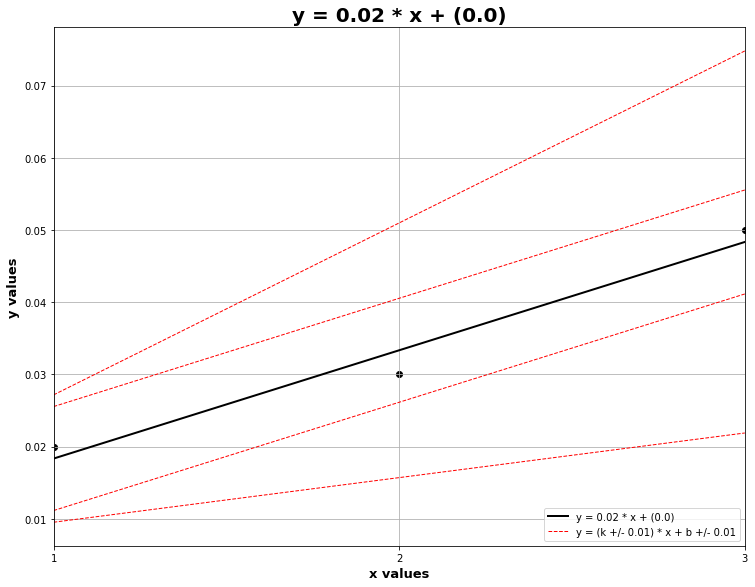

In [43]:
filename = '431.txt'

my_mnk = MNK(filename)

my_mnk.read_data()
my_mnk.show_schedule()

#### Коэффициент наклона прямой $k = 0.02$

#### Расчёт $b$: 

In [112]:
f = 0.27
x = np.array([i * lamb / b * f for i in range(1, 4)])

print(round(1 * lamb / x[0] * f, 6))

0.00089


 $b = 0.00089$ м - сошлось с практически измеренной шириной щели.

### Опыт №2.2

Ширина щели $b = 0.7$ мм

Количество полос: 9

In [114]:
d = 9 * 0.0007 / 2

print(round(f * lamb / d * 1000, 3))

0.048


Расстрояние между полосками $\delta x = 0.048$

# 3. Влияние дифракции на разрешающую способность оптического инструмента.

Экспериментальная ширина щели $b = 0.5$ мм

In [111]:
print(round(lamb * f / d * 100, 3))

0.48351428571428573


Теоретическая ширина щели $b_t = 0.48$ мм